In [ ]:
import pickle
import os

filepath = 'test_adata_combined.h5ad'
file ='test/model_reult.pickle'
model_reult = pickle.load(open(file,'rb'))
import scanpy as sc
count = 0
adata = None
if os.path.exists("test_adata_combined.pickle"):
    adata = pickle.load(open("test_adata_combined.pickle",'rb'))
else:
    adata = sc.read_h5ad(filepath)
    with open("test_adata_combined.pickle", "wb") as f:
        pickle.dump(adata, f)
while not adata:
    try:
        adata = sc.read_h5ad(filepath)
        with open("test_adata_combined.pickle", "wb") as f:
            pickle.dump(adata, f)
    except Exception as e:
        count+=1
        print('try num :',count)

acc, auc_val, fpr, tpr, model, X_test, adata_test, le,metrics_list,types_clean,dflist =model_reult['all']['XGBoost']
print(adata)

/tmp/ipykernel_2636578/1223086440.py:6: UserWarning: [09:00:02] WARNING: /workspace/src/collective/../data/../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  model_reult = pickle.load(open(file,'rb'))


AnnData object with n_obs × n_vars = 286843 × 28913
    obs: 'sample', 'tissue', 'patient', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_hsp', 'pct_counts_hsp', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'n_genes', 'S_score', 'G2M_score', 'phase', 'UMAP_1', 'UMAP_2', 'sub_cluster', 'major_cluster', 'batch', 'cell_type', 'response', 'pre_post'


In [2]:
adata.obs['Cell_Type'] = adata.obs['sub_cluster'].apply(lambda x:x.split('_')[0])
# 检查 pre_post 列是否存在
import sys
import pandas as pd
if 'pre_post' not in adata.obs.columns:
    print("adata.obs 中缺少 'pre_post' 列，程序退出")
    sys.exit()
print(f"pre_post 列的唯一值: {adata.obs['pre_post'].unique().tolist()}")

# 筛选 pre_post == 'Pre' 的行
adata_ = adata[adata.obs['pre_post'] == 'pre'].copy()
print(f"筛选后 pre_post == 'pre' 的样本量: {adata_.shape[0]}")
adata_ = adata_[adata_.obs['pre_post'] == 'pre'].copy()
print(f"筛选后 pre_post == 'Pre' 的样本量: {adata_.shape[0]}")
pd.set_option('display.max_columns', None)
adata_.obs['Cancer_type_update'] = ['HCC']*adata_.obs.shape[0]
adata_.obs

pre_post 列的唯一值: ['post', 'pre']
筛选后 pre_post == 'pre' 的样本量: 98270
筛选后 pre_post == 'Pre' 的样本量: 98270


,sample,tissue,patient,n_genes_by_counts,total_counts,total_counts_rp,pct_counts_rp,total_counts_mt,pct_counts_mt,total_counts_hb,pct_counts_hb,total_counts_hsp,pct_counts_hsp,doublet_scores,predicted_doublets,doublet_info,n_genes,S_score,G2M_score,phase,UMAP_1,UMAP_2,sub_cluster,major_cluster,batch,cell_type,response,pre_post,Cell_Type,Cancer_type_update
P16-pre-P-CD8p2-GGCGACTTCCACGTTC-1,P16-pre-P-CD8p,P,P16,1427,4671.0,1542.0,33.012203,154.0,3.296938,0.0,0.0,13.0,0.278313,0.087618,False,False,1427,0.037808,-0.000656,S,-0.212849,2.458946,CD8_C03_CX3CR1,NaN,cd8,CD8T,non-responder,pre,CD8,HCC
P16-pre-P-CD8p1-CACCACTCAACAACCT-1,P16-pre-P-CD8p,P,P16,1835,7281.0,3163.0,43.441833,264.0,3.625876,0.0,0.0,15.0,0.206016,0.112999,False,False,1835,-0.002969,-0.124453,G1,7.944293,-0.144074,CD8_C01_LEF1,NaN,cd8,CD8T,non-responder,pre,CD8,HCC
P16-pre-P-CD8n-TATTACCGTCCAACTA-1,P16-pre-P-CD8n,P,P16,959,2529.0,996.0,39.383156,231.0,9.134046,0.0,0.0,8.0,0.316331,0.133690,False,False,959,-0.188267,-0.082084,G1,5.682766,3.407964,CD8_C02_GPR183,NaN,cd8,CD8T,non-responder,pre,CD8,HCC
P16-pre-T-CD8p-CTAATGGGTTCCATGA-1,P16-pre-T-CD8p,T,P16,1081,2505.0,496.0,19.800400,72.0,2.874251,0.0,0.0,69.0,2.754491,0.064125,False,False,1081,0.139061,0.017359,S,0.651383,-3.216115,CD8_C08_GZMK,NaN,cd8,CD8T,non-responder,pre,CD8,HCC
P16-pre-P-CD8p1-TGACTTTAGCGTGAGT-1,P16-pre-P-CD8p,P,P16,894,1815.0,353.0,19.449036,205.0,11.294765,0.0,0.0,9.0,0.495868,0.222841,False,False,894,-0.032617,-0.149058,G1,0.857628,-1.018432,CD8_C08_GZMK,NaN,cd8,CD8T,non-responder,pre,CD8,HCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P18-pre-P-CTCTGGTCAGCGTAAG-1,P18-pre-P,P,P18,1396,2318.0,214.0,9.232097,96.0,4.141501,0.0,0.0,26.0,1.121657,0.137306,False,False,1396,0.041544,-0.059760,S,7.865705,-0.785990,CD8_C03_CX3CR1,CD8T,cd45,CD45,responder,pre,CD8,HCC
P27-pre-T-TGAGGGAAGAAGGCCT-1,P27-pre-T,T,P27,1319,3377.0,1045.0,30.944624,137.0,4.056855,0.0,0.0,131.0,3.879183,0.045350,False,False,1319,0.100014,0.030680,S,3.888998,1.845784,CD4_C03_CD44,CD4T,cd45,CD45,responder,pre,CD4,HCC
P27-pre-T-CGTAGGCTCGCATGGC-1,P27-pre-T,T,P27,1205,2150.0,80.0,3.720930,82.0,3.813953,0.0,0.0,181.0,8.418605,0.066667,False,False,1205,-0.219012,-0.135053,G1,9.128882,4.708649,NK_C03_GZMK,ILC,cd45,CD45,responder,pre,NK,HCC
P11-pre-P-ACACCCTCAAGGCTCC-1,P11-pre-P,P,P11,2415,6466.0,1061.0,16.408909,193.0,2.984844,0.0,0.0,49.0,0.757810,0.120760,False,False,2415,-0.131148,1.040371,G2M,4.558650,1.222805,NK_C01_FCGR3A,ILC,cd45,CD45,responder,pre,NK,HCC


In [3]:
def get_train(adata,adata_test,cell_type):
    gene = adata_test.var_names  
    if cell_type == 'all':
        adata_ = adata[adata.obs['Cell_Type'].isin(model_reult.keys()),gene]
    else:
        adata_ = adata[adata.obs['Cell_Type'] == cell_type,gene]
    test_id = adata_test.obs.index
    train_id = set(adata_.obs.index) - set(test_id)
    adata_train =  adata_[list(train_id), :]
    # print(adata_.shape,len(test_id),len(train_id))
    return adata_train
acc, auc_val, fpr, tpr, model, X_test, adata_test, le,metrics_list,types_clean,dflist =model_reult['all']['XGBoost']
get_train(adata_,adata_test,'all') 

View of AnnData object with n_obs × n_vars = 77941 × 1000
    obs: 'sample', 'tissue', 'patient', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_hsp', 'pct_counts_hsp', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'n_genes', 'S_score', 'G2M_score', 'phase', 'UMAP_1', 'UMAP_2', 'sub_cluster', 'major_cluster', 'batch', 'cell_type', 'response', 'pre_post', 'Cell_Type', 'Cancer_type_update'

In [4]:
import pickle
def read_pickle(file:str):
    data = pickle.load(open(file,'rb'))
    return data
def to_pickle(data,file):
    pickle.dump(data,open(file,'wb'))
file ='/mnt/data/wangw/AFS/赵路晴/test/model_reult.pickle'
model_reult = pickle.load(open(file,'rb'))
train_data_clean = read_pickle('/mnt/data/wangw/AFS/赵路晴/new_data/train_shap/train_data_clean.pickle')

In [5]:
import sys
sys.path.append('/mnt/nas/AFS项目数据/wangw/wangw/model_afs')
from model_afs.model_param_grid import ModelsClassifier
import pandas as pd

In [6]:
import os

pid = os.getpid()
print("当前进程 PID:", pid)

当前进程 PID: 2636578


In [ ]:
os.chdir('new_data/train_shap')
for types in model_reult:
    model_name = 'XGBoost'
    file =f'new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
    feature_importance = pickle.load(open(file,'rb'))
    feature_importance = feature_importance[feature_importance['Mean SHAP Value']>0]
    
    for i in [i for i in [5, 10, 20, 50, 100, 200, len(feature_importance)] if i <= len(feature_importance)]:
        # if i>len(feature_importance):
        #     i = len(feature_importance)
        if os.path.exists(f'{model_name}_{types}_model.{i}.result'):
            continue
    # for model_name in model_reult[types]:
        feature = feature_importance['Feature'][:i]
        # file =f'/mnt/data/wangw/AFS/赵路晴/new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
        # if not os.path.exists(file):
        acc, auc_val, fpr, tpr, model, X_test, adata_test, le, metrics_list, types_clean, dflist = model_reult[types][model_name]
        gene = train_data_clean[types]['gene']
        X_train = train_data_clean[types]['X_train']
        y_train = train_data_clean[types]['y_train']
        X_train = pd.DataFrame(X_train,columns=gene)
        X_test = pd.DataFrame(X_test,columns=gene)
        y_test = [1 if i == 'responder' else 0 for i in adata_test.obs['response'].values]
        X = pd.concat([X_train,X_test])
        X.columns = gene
        
        y = y_train + y_test
        y = pd.Series(y)
        clf = ModelsClassifier(
            model_name=model_name,  # 可换成你配置 JSON 中的模型名
            X=X[feature],
            y=y,
            data_name=f'{types}_shap_{i}',
            device="cuda"  # 或 "cuda" 取决于是否用GPU
        )
        clf.X_test = X_test[feature]
        clf.X_train = X_train[feature]
        clf.y_test = pd.Series(y_test)
        clf.y_train = pd.Series(y_train)
        if os.path.exists(f"{model_name}_{types}_model.{i}.result"):
            continue
        results = clf.train_model()
        clf.save_model(f"{model_name}_{types}_model.{i}.pkl")
        clf.save_results(f"{model_name}_{types}_model.{i}.result")
        outdir="./shap_output"
        clf.shap_plot(outdir=outdir,plot_type='dot', shap_plot_file=f'SHAP_{model_name}_{types}_model.dot.{i}.pdf', force=True)
        clf.roc_plot(roc_plot_file =f'ROC_{model_name}_{types}_model.{i}.pdf', force=True)




Start RandomizedSearchCV: XGBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/wangw/miniconda3/envs/model_afs/lib/python3.11/site-packages/xgboost/core.py:729: UserWarning: [09:05:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


✅ 最优参数组合： {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.6}
✅ XGBoost 最佳ROC AUC: 0.9945 (95% CI: 0.9936 - 0.9955)
   🎯 ACC: 0.9618 | Precision: 0.9541 | Recall: 0.9563 | F1: 0.9552
   📊 混淆矩阵 (Confusion Matrix):
           Pred 0    Pred 1    
   True 0  4990      176       
   True 1  167       3657      
✅ 模型已保存至: XGBoost_CD8_model.200.pkl
✅ results已保存至: XGBoost_CD8_model.200.result
X_test type is: <class 'pandas.core.frame.DataFrame'> True
There are 200/200 features have nozero shap value !
🧠 已保存 SHAP summary plot 至: SHAP_XGBoost_CD8_model.dot.200.pdf
📉 ROC 曲线已保存至: ./ROC_XGBoost_CD8_model.200.pdf
Start RandomizedSearchCV: XGBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ 最优参数组合： {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.6}
✅ XGBoost 最佳ROC AUC: 0.9766 (95% CI: 0.9718 - 0.9812)
  

In [ ]:

for types in model_reult:
    model_name = 'XGBoost'
    file =f'new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
    feature_importance = pickle.load(open(file,'rb'))
    feature_importance = feature_importance[feature_importance['Mean SHAP Value']>0]
    
    
        # if i>len(feature_importance):
        #     i = len(feature_importance)
    if os.path.exists(f'{model_name}_{types}_model.orgin.result'):
        continue
# for model_name in model_reult[types]:
    # feature = feature_importance['Feature'][:i]
    # file =f'new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
    # if not os.path.exists(file):
    acc, auc_val, fpr, tpr, model, X_test, adata_test, le, metrics_list, types_clean, dflist = model_reult[types][model_name]
    gene = train_data_clean[types]['gene']
    X_train = train_data_clean[types]['X_train']
    y_train = train_data_clean[types]['y_train']
    X_train = pd.DataFrame(X_train,columns=gene)
    X_test = pd.DataFrame(X_test,columns=gene)
    y_test = [1 if i == 'responder' else 0 for i in adata_test.obs['response'].values]
    X = pd.concat([X_train,X_test])
    X.columns = gene
    
    y = y_train + y_test
    y = pd.Series(y)
    clf = ModelsClassifier(
        model_name=model_name,  # 可换成你配置 JSON 中的模型名
        X=X,
        y=y,
        data_name=f'{types}_shap',
        device="cuda"  # 或 "cuda" 取决于是否用GPU
    )
    clf.X_test = X_test
    clf.X_train = X_train
    clf.y_test = pd.Series(y_test)
    clf.y_train = pd.Series(y_train)
    if os.path.exists(f"{model_name}_{types}_model.orgin.result"):
        continue
    results = clf.train_model()
    clf.save_model(f"{model_name}_{types}_model.orgin.pkl")
    clf.save_results(f"{model_name}_{types}_model.orgin.result")
    outdir="./shap_output"
    clf.shap_plot(outdir=outdir,plot_type='dot', shap_plot_file=f'SHAP_{model_name}_{types}_model.dot.orgin.pdf', force=True)
    clf.roc_plot(roc_plot_file =f'ROC_{model_name}_{types}_model.orgin.pdf', force=True)


['10', '100', '20', '200', '5', '50', '650']

📦 results已从 XGBoost_Mono_model.5.result 加载。
📦 results已从 XGBoost_Mono_model.10.result 加载。
📦 results已从 XGBoost_Mono_model.20.result 加载。
📦 results已从 XGBoost_Mono_model.50.result 加载。
📦 results已从 XGBoost_Mono_model.100.result 加载。
📦 results已从 XGBoost_Mono_model.170.result 加载。


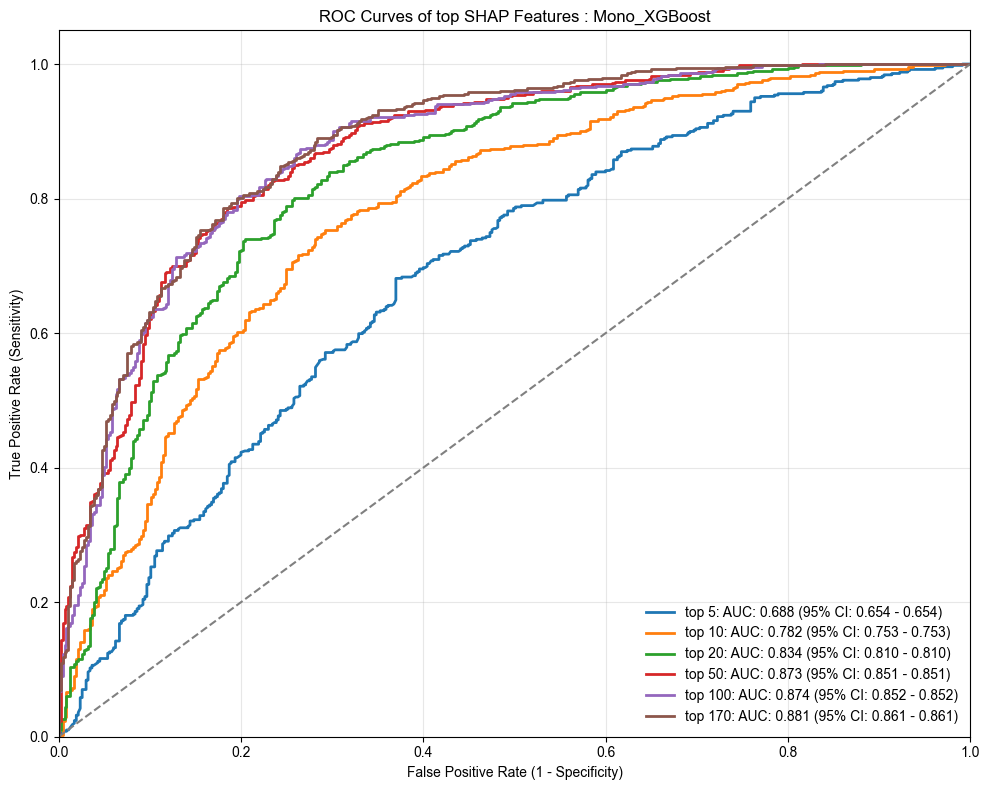

📦 results已从 XGBoost_Plasma_model.5.result 加载。
📦 results已从 XGBoost_Plasma_model.10.result 加载。
📦 results已从 XGBoost_Plasma_model.20.result 加载。
📦 results已从 XGBoost_Plasma_model.50.result 加载。
📦 results已从 XGBoost_Plasma_model.69.result 加载。


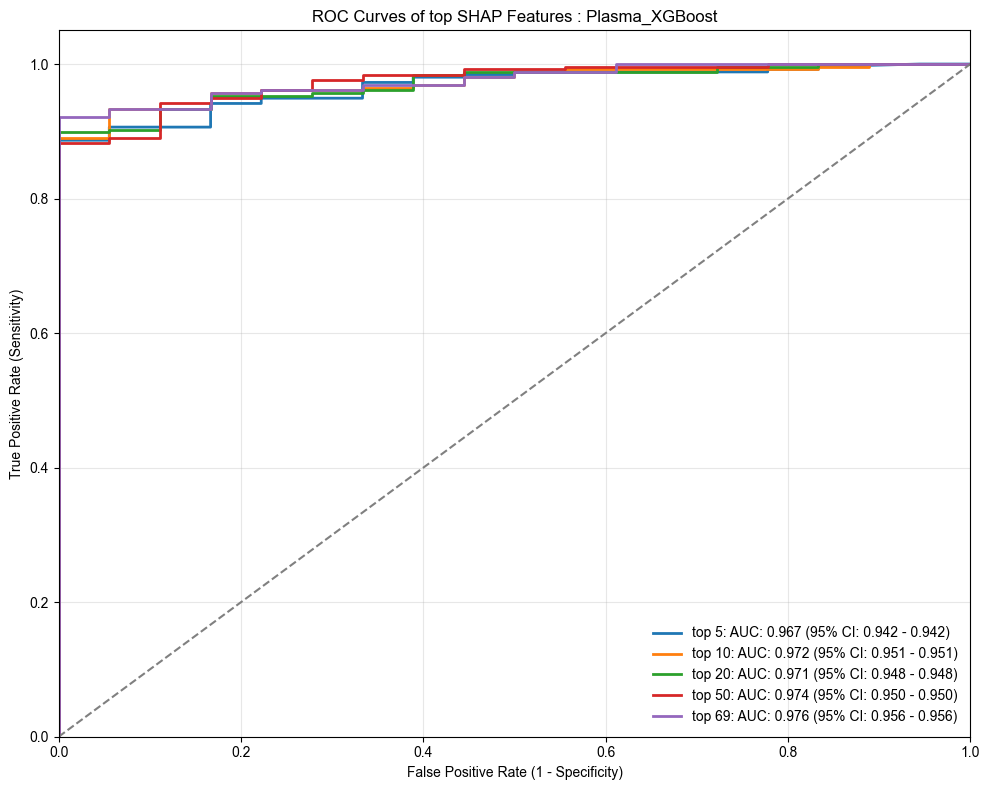

📦 results已从 XGBoost_B_model.5.result 加载。
📦 results已从 XGBoost_B_model.10.result 加载。
📦 results已从 XGBoost_B_model.20.result 加载。
📦 results已从 XGBoost_B_model.50.result 加载。
📦 results已从 XGBoost_B_model.100.result 加载。
📦 results已从 XGBoost_B_model.136.result 加载。


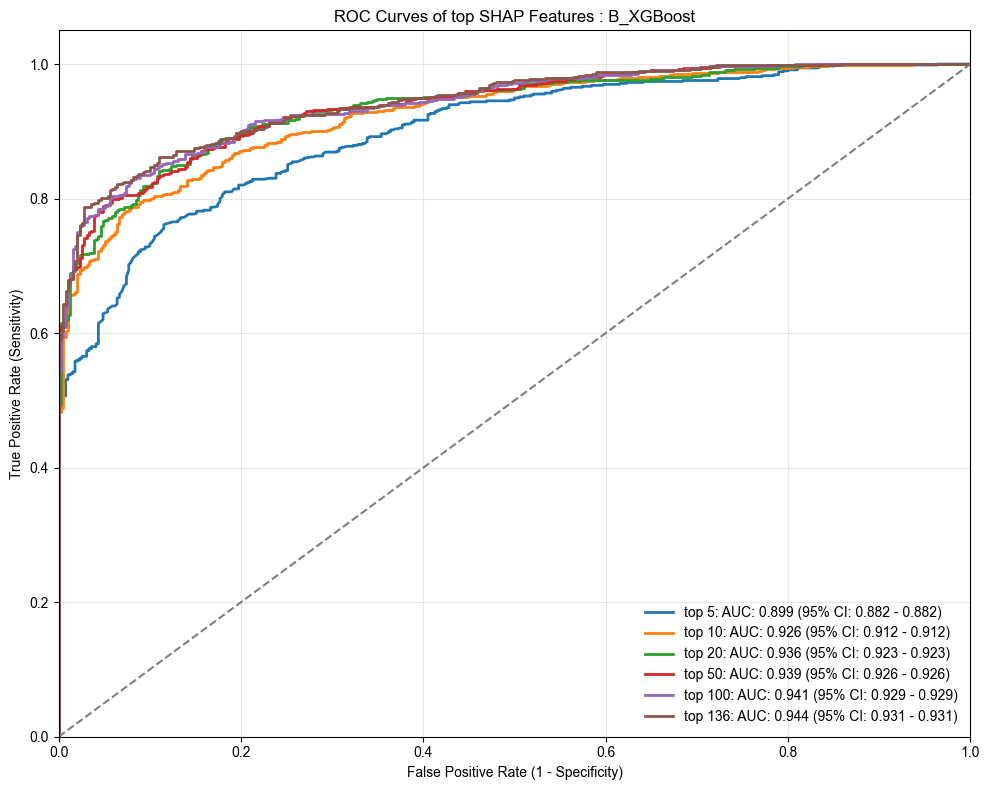

📦 results已从 XGBoost_gdT_model.5.result 加载。
📦 results已从 XGBoost_gdT_model.10.result 加载。
📦 results已从 XGBoost_gdT_model.20.result 加载。
📦 results已从 XGBoost_gdT_model.50.result 加载。
📦 results已从 XGBoost_gdT_model.76.result 加载。


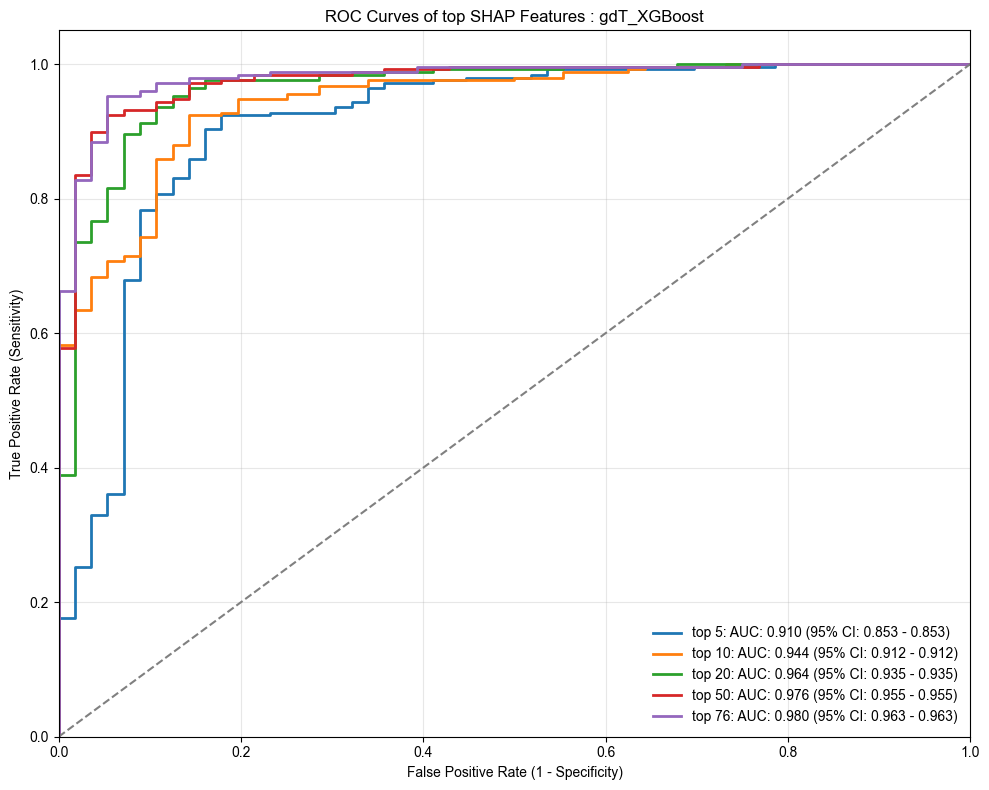

📦 results已从 XGBoost_cDC2_model.5.result 加载。
📦 results已从 XGBoost_cDC2_model.10.result 加载。
📦 results已从 XGBoost_cDC2_model.20.result 加载。
📦 results已从 XGBoost_cDC2_model.50.result 加载。
📦 results已从 XGBoost_cDC2_model.100.result 加载。
📦 results已从 XGBoost_cDC2_model.103.result 加载。


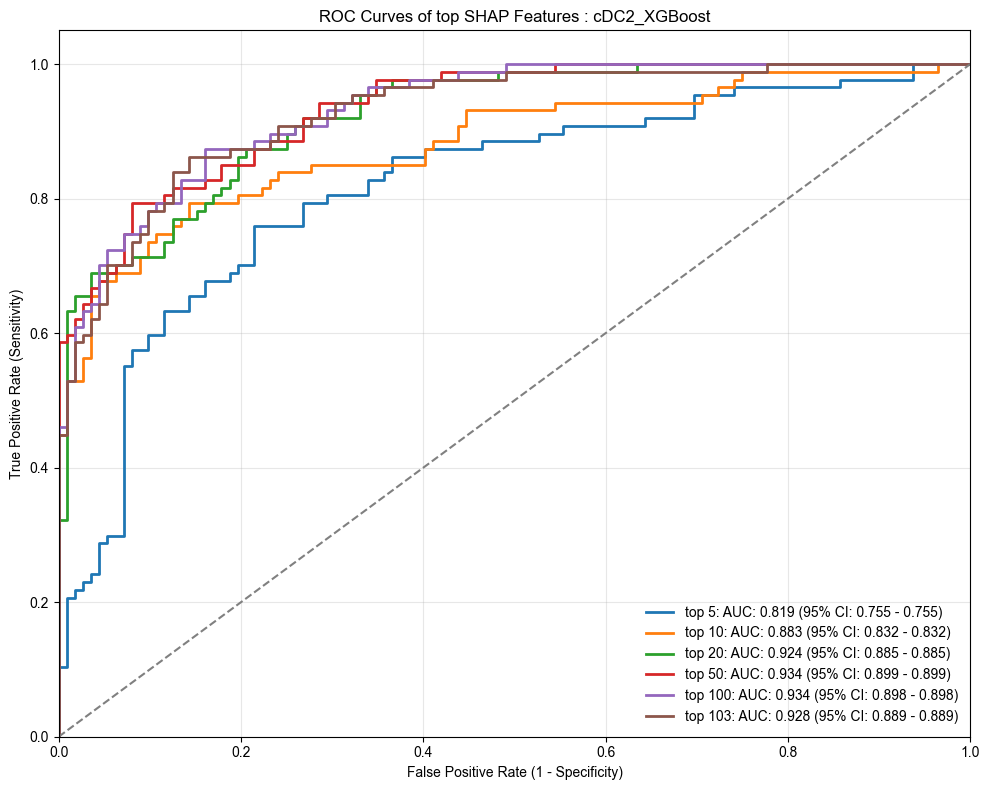

📦 results已从 XGBoost_pDC_model.5.result 加载。
📦 results已从 XGBoost_pDC_model.10.result 加载。
📦 results已从 XGBoost_pDC_model.20.result 加载。
📦 results已从 XGBoost_pDC_model.50.result 加载。
📦 results已从 XGBoost_pDC_model.74.result 加载。


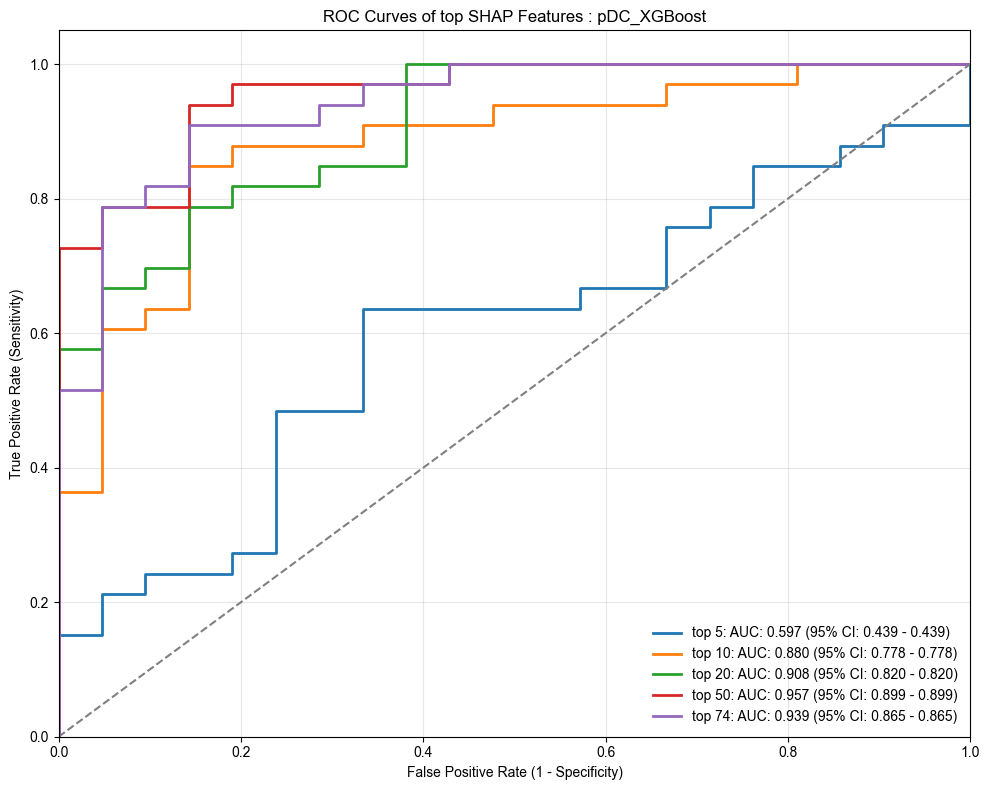

📦 results已从 XGBoost_CD8_model.5.result 加载。
📦 results已从 XGBoost_CD8_model.10.result 加载。
📦 results已从 XGBoost_CD8_model.20.result 加载。
📦 results已从 XGBoost_CD8_model.50.result 加载。
📦 results已从 XGBoost_CD8_model.100.result 加载。
📦 results已从 XGBoost_CD8_model.200.result 加载。
📦 results已从 XGBoost_CD8_model.446.result 加载。


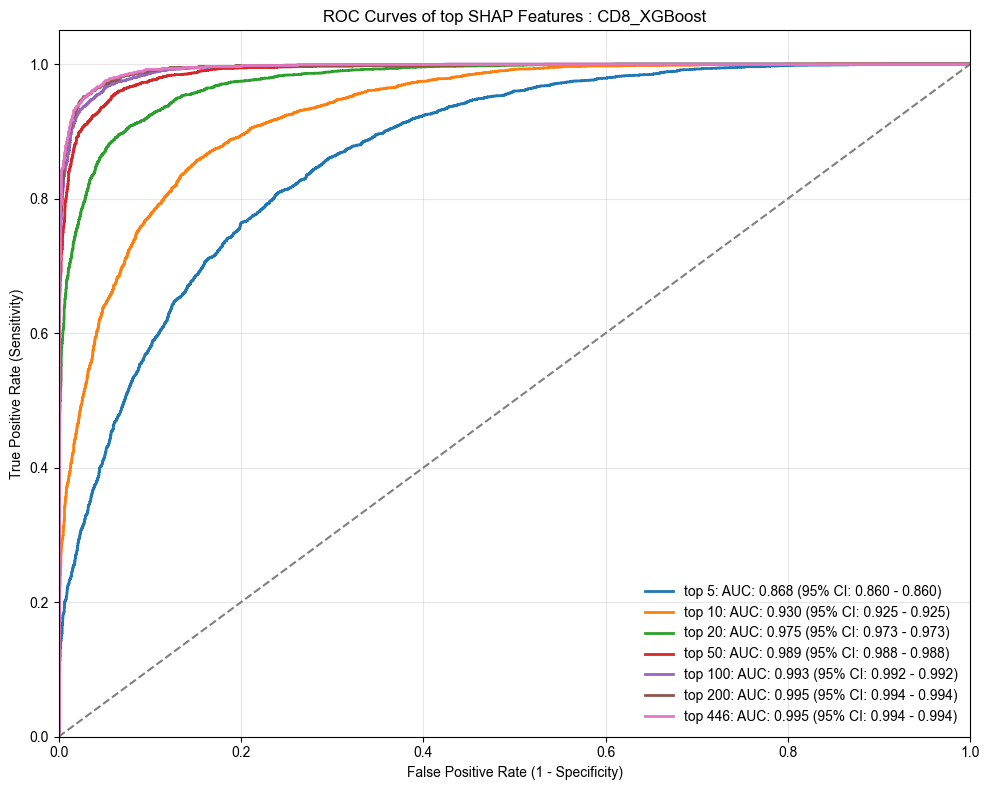

📦 results已从 XGBoost_NK_model.5.result 加载。
📦 results已从 XGBoost_NK_model.10.result 加载。
📦 results已从 XGBoost_NK_model.20.result 加载。
📦 results已从 XGBoost_NK_model.50.result 加载。
📦 results已从 XGBoost_NK_model.100.result 加载。
📦 results已从 XGBoost_NK_model.200.result 加载。
📦 results已从 XGBoost_NK_model.298.result 加载。


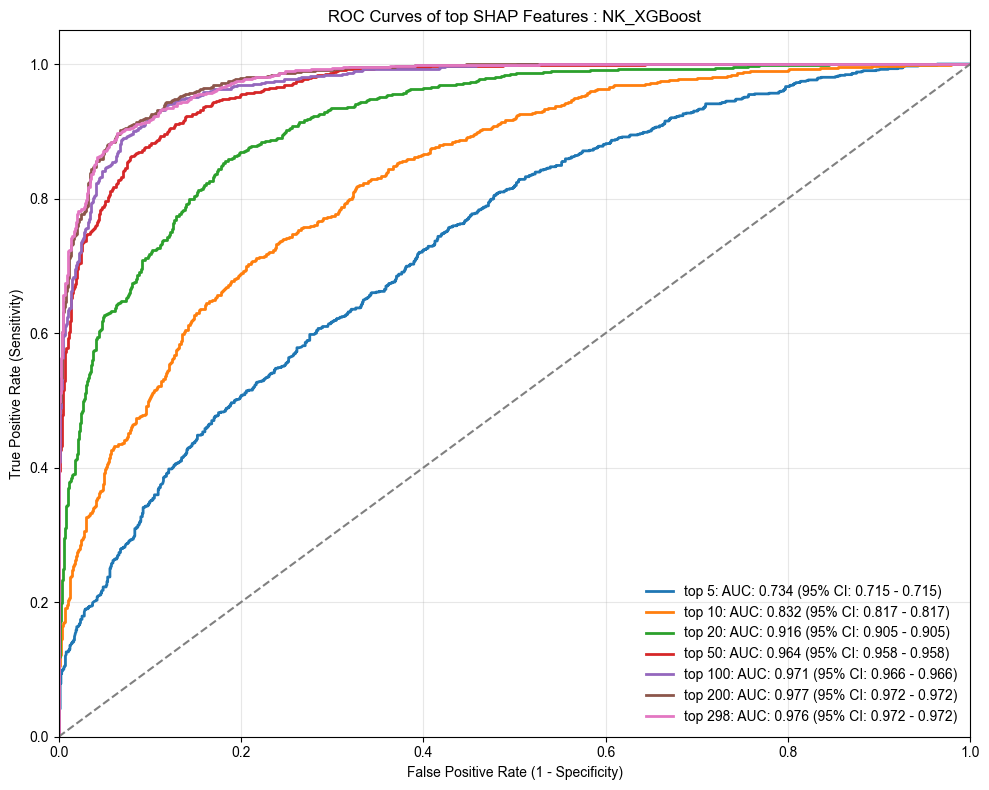

📦 results已从 XGBoost_cDC1_model.5.result 加载。
📦 results已从 XGBoost_cDC1_model.10.result 加载。
📦 results已从 XGBoost_cDC1_model.20.result 加载。
📦 results已从 XGBoost_cDC1_model.50.result 加载。
📦 results已从 XGBoost_cDC1_model.66.result 加载。


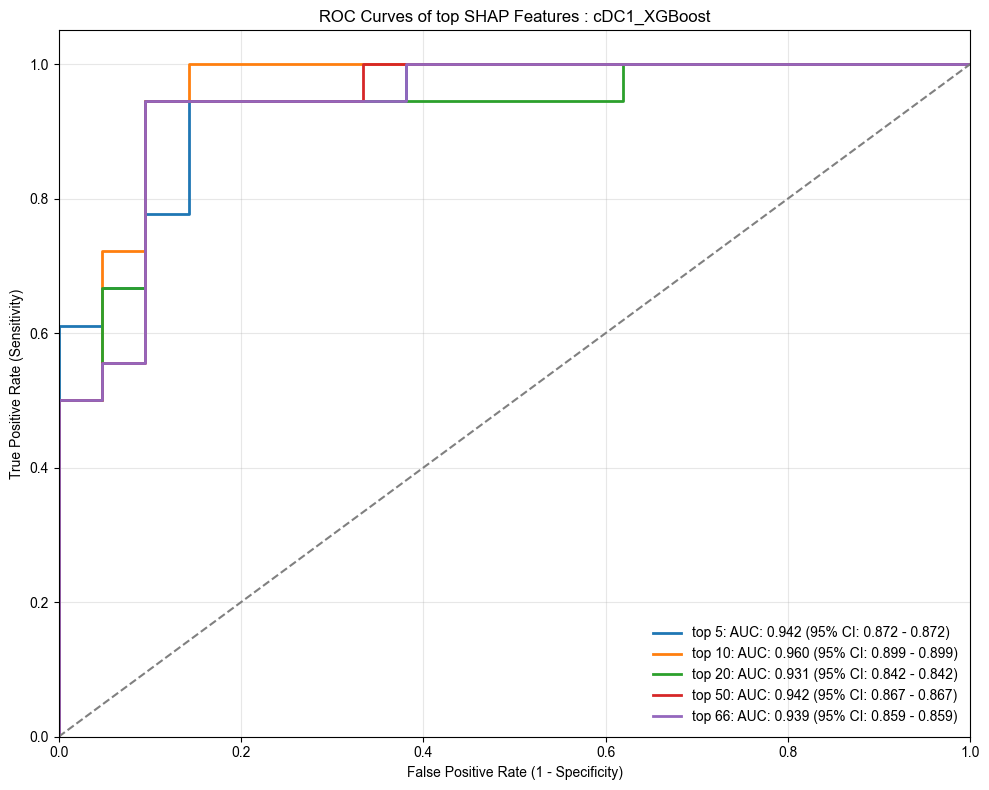

📦 results已从 XGBoost_CD4_model.5.result 加载。
📦 results已从 XGBoost_CD4_model.10.result 加载。
📦 results已从 XGBoost_CD4_model.20.result 加载。
📦 results已从 XGBoost_CD4_model.50.result 加载。
📦 results已从 XGBoost_CD4_model.100.result 加载。
📦 results已从 XGBoost_CD4_model.200.result 加载。
📦 results已从 XGBoost_CD4_model.203.result 加载。


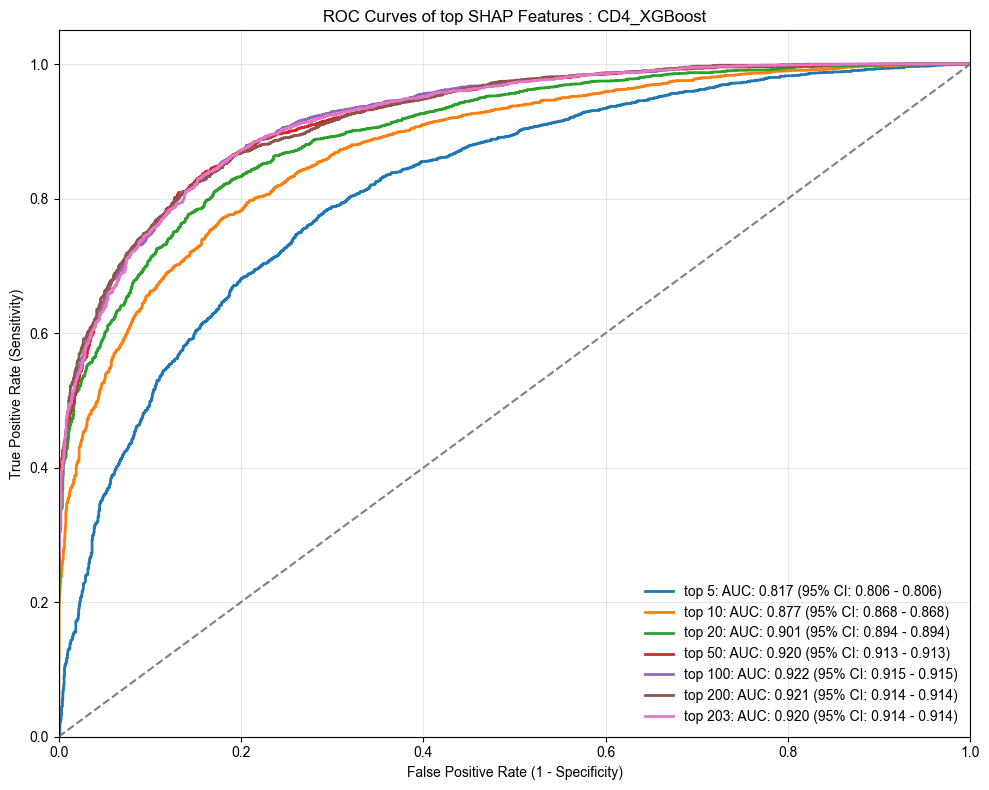

📦 results已从 XGBoost_Macro_model.5.result 加载。
📦 results已从 XGBoost_Macro_model.10.result 加载。
📦 results已从 XGBoost_Macro_model.20.result 加载。
📦 results已从 XGBoost_Macro_model.50.result 加载。
📦 results已从 XGBoost_Macro_model.77.result 加载。


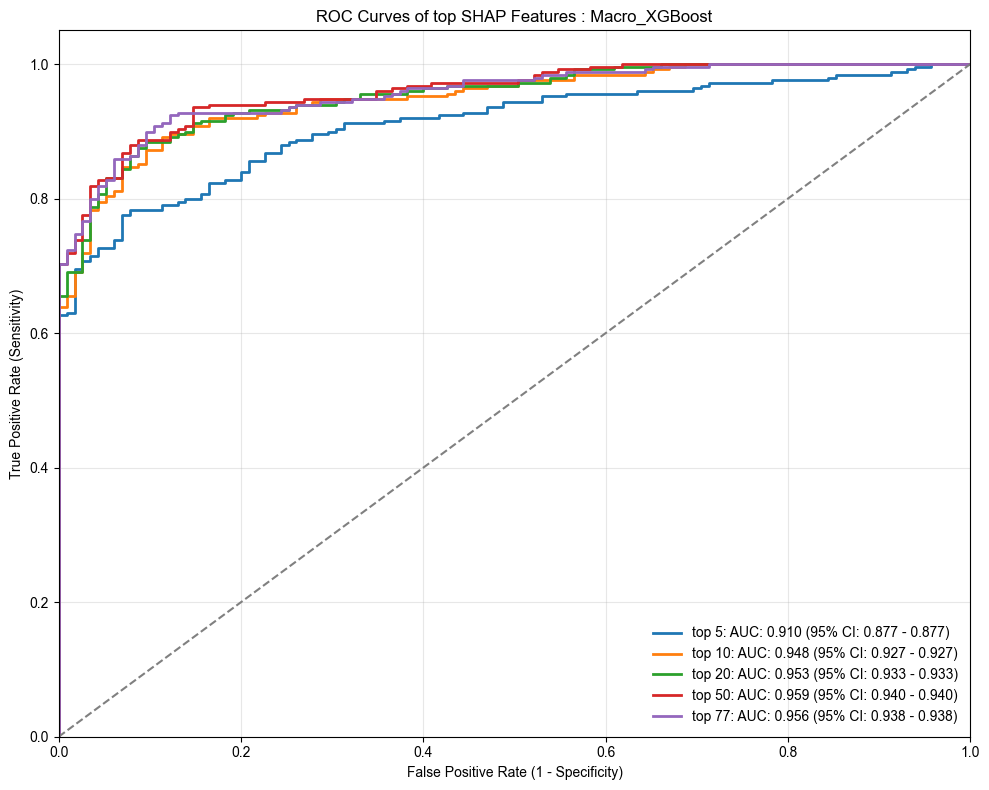

📦 results已从 XGBoost_all_model.5.result 加载。
📦 results已从 XGBoost_all_model.10.result 加载。
📦 results已从 XGBoost_all_model.20.result 加载。
📦 results已从 XGBoost_all_model.50.result 加载。
📦 results已从 XGBoost_all_model.100.result 加载。
📦 results已从 XGBoost_all_model.200.result 加载。
📦 results已从 XGBoost_all_model.650.result 加载。


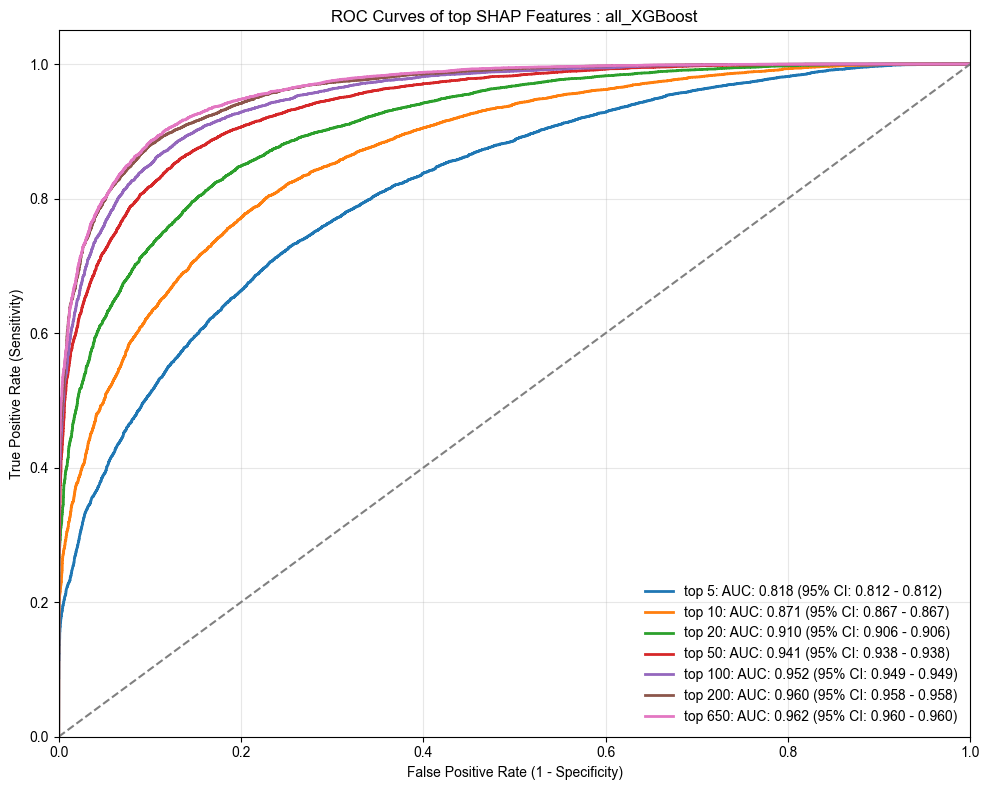

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
for types in model_reult:
    plt.figure(figsize=(10,8))
    plot_file = f'new_data/train_shap/ROC_topshap_{types}.{model_name}.pdf'
    n_list = []
    for model_result_file in glob.glob(f"{model_name}_{types}_model.*.result"):
        num = model_result_file.split('.')[-2]
        n_list.append(int(num))
    n_list.sort()
    for num in n_list:
        model_result_file = f"{model_name}_{types}_model.{num}.result"
        result = clf.load_results(model_result_file)
        # num = model_result_file.split('.')[-2]
        plt.plot(result['fpr'], result['tpr'], lw=2, label=f"top {num}: AUC: {result['auc']:.3f} (95% CI: {result['auc_ci'][0]:.3f} - {result['auc_ci'][0]:.3f})")
    plt.plot([0,1], [0,1], color="gray", lw=1.5, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title(f"ROC Curves of top SHAP Features : {types}_{model_name}")
    plt.legend(loc="lower right", frameon=False)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(plot_file)
    plt.show()
    plt.close()

In [24]:
import glob
model_name = 'XGBoost'
with open(f'{model_name}_shap.split.result.csv','w')as f:
    title = ['CellTypes','feature_top','acc','precision','recall','f1','auc', 'auc_ci', 'confusion_matrix']
    print(','.join(title),end='\n',file=f)
    for types in model_reult:
        for model_result_file in glob.glob(f"{model_name}_{types}_model.*.result"):
            result = clf.load_results(model_result_file)
            num = model_result_file.split('.')[-2]
            print(types,num,sep=',',end=',',file=f)
            for i in title:
                if i =='auc_ci':
                    print(f"(95% CI: {result[i][0]:.4f} - {result[i][1]:.4f})",end=',',file=f)
                elif i == 'confusion_matrix':
                    print(str(result[i]).replace(',',' '),end=',',file=f)
                elif i in result:
                    print(result[i],end=',',file=f)
            print('\n',end ='',file=f)

📦 results已从 XGBoost_Mono_model.20.result 加载。
📦 results已从 XGBoost_Mono_model.50.result 加载。
📦 results已从 XGBoost_Mono_model.100.result 加载。
📦 results已从 XGBoost_Mono_model.170.result 加载。
📦 results已从 XGBoost_Mono_model.5.result 加载。
📦 results已从 XGBoost_Mono_model.10.result 加载。
📦 results已从 XGBoost_Plasma_model.20.result 加载。
📦 results已从 XGBoost_Plasma_model.50.result 加载。
📦 results已从 XGBoost_Plasma_model.69.result 加载。
📦 results已从 XGBoost_Plasma_model.5.result 加载。
📦 results已从 XGBoost_Plasma_model.10.result 加载。
📦 results已从 XGBoost_B_model.20.result 加载。
📦 results已从 XGBoost_B_model.50.result 加载。
📦 results已从 XGBoost_B_model.100.result 加载。
📦 results已从 XGBoost_B_model.136.result 加载。
📦 results已从 XGBoost_B_model.5.result 加载。
📦 results已从 XGBoost_B_model.10.result 加载。
📦 results已从 XGBoost_gdT_model.20.result 加载。
📦 results已从 XGBoost_gdT_model.50.result 加载。
📦 results已从 XGBoost_gdT_model.76.result 加载。
📦 results已从 XGBoost_gdT_model.5.result 加载。
📦 results已从 XGBoost_gdT_model.10.result 加载。
📦 results已从 XGBoost_cDC

In [16]:
model_reult.keys()

dict_keys(['Mono', 'Plasma', 'B', 'gdT', 'cDC2', 'pDC', 'CD8', 'NK', 'cDC1', 'CD4', 'Macro', 'all'])

In [17]:
results.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test', 'searcher', 'best_model', 'y_proba', 'y_pred', 'acc', 'precision', 'recall', 'f1', 'auc', 'fpr', 'tpr', 'auc_ci', 'confusion_matrix', 'X', 'y'])

In [ ]:
import pandas as pd
# GSE54236_exp = pd.read_csv('new_data/data_with_responder/GSE54236/GSE54236_expression_by_gene.csv')
GSE54236_exp = pd.read_csv('new_data/data_with_responder/GSE54236/GSE54236_expression_by_gene.test.csv')
GSE54236_exp.index = GSE54236_exp['Unnamed: 0'].values
GSE54236_exp = GSE54236_exp.drop(columns=['Unnamed: 0'])
GSE54236_exp = GSE54236_exp.T
GSE54236_exp.dropna(how='all',inplace=True)
def read_matrix(file):
    with open(file)as f:
        result = {}
        for line in f:
            if line[0] =='"':
                # print(line[0])
                break
            lines = line.strip('\n').replace('"','').split('\t')
            if len(lines[0])>0:
                if lines[0][1:]  == 'Sample_characteristics_ch1':
                    result[lines[1].split(':')[0]] = lines[1:]
                else:
                    result[lines[0][1:]] = lines[1:] 
    sample_len =max([len(i) for i in result.values()])             
    
    return result,sample_len
test_file = 'new_data/data_with_responder/GSE54236/GSE54236_series_matrix.txt'
def dic2df(dic:dict,sample_len):
    df = pd.DataFrame()
    for k in dic:
        if len(dic[k])==sample_len:
            df[k] = dic[k]
    
    return df  
result,sample_len = read_matrix(test_file)

df_matrix = dic2df(result,sample_len)
pd.set_option('display.max_columns', None)
print(df_matrix.shape)

df_matrix[:5]

(161, 37)


,Sample_title,Sample_geo_accession,Sample_status,Sample_submission_date,Sample_last_update_date,Sample_type,Sample_channel_count,Sample_source_name_ch1,Sample_organism_ch1,tissue type,tissue,gender,doubling time (days),survival time(months),amplification and labeling kit,scanner update,feature extraction software update,Sample_molecule_ch1,Sample_extract_protocol_ch1,Sample_label_ch1,Sample_label_protocol_ch1,Sample_taxid_ch1,Sample_hyb_protocol,Sample_scan_protocol,Sample_description,Sample_data_processing,Sample_platform_id,Sample_contact_name,Sample_contact_email,Sample_contact_phone,Sample_contact_institute,Sample_contact_address,Sample_contact_city,Sample_contact_zip/postal_code,Sample_contact_country,Sample_supplementary_file,Sample_data_row_count
0,Tumor T_A_001,GSM1310570,Public on Jan 22 2014,Jan 21 2014,Jan 22 2014,RNA,1,Biopsy of tumor tissue,Homo sapiens,tissue type: Biopsy of tumor tissue,tissue: Liver,gender: female,doubling time (days): 119,survival time(months): 52,amplification and labeling kit: Agilent Low RN...,scanner update: G2505B,feature extraction software update: FES 9.5.1.1,total RNA,Total RNA was isolated from non tumor (NT) and...,Cy3,Cyanine-3 (Cy3) Cy3-labeled cRNA was prepared ...,9606,Cy3 labeled cRNAs were hybridized overnight (1...,Fluorescence signals of the hybridized Agilent...,Gene expression of tumor liver tissue,The Agilent Feature Extraction Software was us...,GPL6480,"Erica,,Villa",erica.villa@unimore.it,+390594225308,University of Modena and Reggio Emilia,Via del Pozzo 71,Modena,41124,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1310...,41000
1,Tumor T_B_003,GSM1310571,Public on Jan 22 2014,Jan 21 2014,Jan 22 2014,RNA,1,Biopsy of tumor tissue,Homo sapiens,tissue type: Biopsy of tumor tissue,tissue: Liver,gender: male,doubling time (days): 98,survival time(months): 44,amplification and labeling kit: Agilent Low RN...,scanner update: G2505B,feature extraction software update: FES 9.5.1.1,total RNA,Total RNA was isolated from non tumor (NT) and...,Cy3,Cyanine-3 (Cy3) Cy3-labeled cRNA was prepared ...,9606,Cy3 labeled cRNAs were hybridized overnight (1...,Fluorescence signals of the hybridized Agilent...,Gene expression of tumor liver tissue,The Agilent Feature Extraction Software was us...,GPL6480,"Erica,,Villa",erica.villa@unimore.it,+390594225308,University of Modena and Reggio Emilia,Via del Pozzo 71,Modena,41124,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1310...,41000
2,Tumor T_C_005,GSM1310572,Public on Jan 22 2014,Jan 21 2014,Jan 22 2014,RNA,1,Biopsy of tumor tissue,Homo sapiens,tissue type: Biopsy of tumor tissue,tissue: Liver,gender: male,doubling time (days): 50,survival time(months): 3,amplification and labeling kit: Agilent Low RN...,scanner update: G2505B,feature extraction software update: FES 9.5.1.1,total RNA,Total RNA was isolated from non tumor (NT) and...,Cy3,Cyanine-3 (Cy3) Cy3-labeled cRNA was prepared ...,9606,Cy3 labeled cRNAs were hybridized overnight (1...,Fluorescence signals of the hybridized Agilent...,Gene expression of tumor liver tissue,The Agilent Feature Extraction Software was us...,GPL6480,"Erica,,Villa",erica.villa@unimore.it,+390594225308,University of Modena and Reggio Emilia,Via del Pozzo 71,Modena,41124,Italy,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1310...,41000
3,Tumor T_D_007,GSM1310573,Public on Jan 22 2014,Jan 21 2014,Jan 22 2014,RNA,1,Biopsy of tumor tissue,Homo sapiens,tissue type: Biopsy of tumor tissue,tissue: Liver,gender: male,doubling time (days): 80,survival time(months): 28,amplification and labeling kit: Agilent Low RN...,scanner update: G2505B,feature extraction software update: FES 9.5.1.1,total RNA,Total RNA was isolated from non tumor (NT) and...,Cy3,Cyanine-3 (Cy3) Cy3-labeled cRNA was prepared ...,9606,Cy3 labeled cRNAs were hybridized overnight (1...,Fluorescence signals of the hybridized Agilent...,Gene expression of tumor liver tissue,The Agilent Feature Extraction Software was us...,GPL6480,"Erica,,Villa",erica.vill

In [10]:
import anndata as ad
adata = ad.AnnData(GSE54236_exp)
adata.obs = df_matrix
adata.obs.index = df_matrix['Sample_geo_accession'].apply(lambda x : x.replace('HCC ','')).values
adata_ = adata[adata.obs['tissue type'] == 'tissue type: Biopsy of tumor tissue']
adata_

/home/wangw/miniconda3/envs/model_afs/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


View of AnnData object with n_obs × n_vars = 81 × 19969
    obs: 'Sample_title', 'Sample_geo_accession', 'Sample_status', 'Sample_submission_date', 'Sample_last_update_date', 'Sample_type', 'Sample_channel_count', 'Sample_source_name_ch1', 'Sample_organism_ch1', 'tissue type', 'tissue', 'gender', 'doubling time (days)', 'survival time(months)', 'amplification and labeling kit', 'scanner update', 'feature extraction software update', 'Sample_molecule_ch1', 'Sample_extract_protocol_ch1', 'Sample_label_ch1', 'Sample_label_protocol_ch1', 'Sample_taxid_ch1', 'Sample_hyb_protocol', 'Sample_scan_protocol', 'Sample_description', 'Sample_data_processing', 'Sample_platform_id', 'Sample_contact_name', 'Sample_contact_email', 'Sample_contact_phone', 'Sample_contact_institute', 'Sample_contact_address', 'Sample_contact_city', 'Sample_contact_zip/postal_code', 'Sample_contact_country', 'Sample_supplementary_file', 'Sample_data_row_count'

In [7]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve,confusion_matrix)
def get_confusion_matrix(y_test,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = {
                        "TP": int(tp),
                        "TN": int(tn),
                        "FP": int(fp),
                        "FN": int(fn)
                        }
    print(f"   📊 混淆矩阵 (Confusion Matrix):")
    print(f"   {'':<8}{'Pred 0':<10}{'Pred 1':<10}")
    print(f"   {'True 0':<8}{tn:<10}{fp:<10}")
    print(f"   {'True 1':<8}{fn:<10}{tp:<10}")
    return conf_matrix

In [8]:
model_name = 'XGBoost'
import glob
for types in model_reult:
    for model_result_file in glob.glob(f"{model_name}_{types}_model.*.result"):
        result = clf.load_results(model_result_file)
        i = model_result_file.split('.')[-2]
        clf.best_model = clf.load_model(f"{model_name}_{types}_model.{i}.pkl")
        if len(set(clf.feature_names) - set(GSE54236_exp.columns)) == 0:
            print(model_name,types,i)  
            # print(clf.best_model.predict(GSE54236_exp[clf.feature_names]))
        



In [13]:
types = 'cDC2'
i = 20
clf.best_model = clf.load_model(f"{model_name}_{types}_model.{i}.pkl")
clf.results = clf.load_results(f"{model_name}_{types}_model.{i}.result")
clf.best_model.predict(GSE54236_exp[clf.feature_names])
# len(clf.feature_names)

📦 模型已从 XGBoost_cDC2_model.20.pkl 加载。
📦 results已从 XGBoost_cDC2_model.20.result 加载。


/home/wangw/miniconda3/envs/model_afs/lib/python3.11/site-packages/xgboost/core.py:729: UserWarning: [17:31:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0])

In [21]:
clf.X

,FOS,EEF1A1,IGHG1,HBB,MALAT1,DNAJB1,HSP90AA1,FTH1,IGLV2-14,RPS12,HSPA1A,RPLP1,IGLV6-57,HLA-DRB1,IGKV3-15,HLA-DRB5,HLA-DQB1,IGKV1D-16,FCGR3A,RPL10,SERPINA1,OASL,VIM,HSPA1B,IGHV3-23,SAT1,TNFRSF4,SOD2,KLRC1,CTLA4,ACTB,CXCR6,CD63,LYZ,IGLV7-46,IRF4,XCL1,IGLV2-23,CCL4,IER3,EGR1,TRAV13-2,KLF4,APOE,CD40LG,HLA-DQA2,FXYD2,LAG3,KIR3DL1,FTL,SGK1,IGLV1-44,RALA,HLA-DPA1,PDE4DIP,FGL2,S100A9,TXN,LDLRAD4,CXCL13,TRDV2,MYOM2,TXNRD1,TRGV2,CCL4L2,CRTAM,CH25H,DUSP4,VCAM1,LINC01115,CD74,TNF,PLIN2,FGR,APOC2,TRBV6-2,IGKV3-20,PHLDA1,NMB,TNFRSF18,ITM2C,TRBV28,C1QB,KLRC2,TRAV1-1,APOC1,KCNQ1OT1,TIMP1,NUSAP1,MT1X,C1QC,HLA-DPB1,CENPF,SPP1,LGMN,RETN,DUSP6,TNFSF14,ETS2,ICAM1,IGLV4-69,CTSB,HLA-DRA,HSPA6,IGHV5-51,TRBV7-2,IGHV4-39,TRBV30,LIPA,TRAF1,TMEM176B,IL1B,PLAAT2,PSAP,MS4A1,HSPA2,UBD,TRBV15,C1QA,IGLV3-21,CD79A,LINC02432,IGHV1-69D,HLA-DQA1,IGKC,OSM,LAYN,IL4I1,PTGDS,IRF8,IL2RA,CCNB1,S100A8,IGLV3-25,CCL3L1,CLEC12A,BRI3,IGHV3-72,CEBPD,FCN1,ZNF683,TRAV29DV5,CST3,TRBV6-1,IGHV3-48,FLT1,TRBV4-2,CAPG,ATF5,TM4SF1,RASL11A,CALHM6,FABP5,HES4,BCL2A1,LGALS3,MNDA,SERPINH1,ID3,RASD1,TRBV27,SPINK1,MARCKS,SLC31A2,CD200,TRBV20-1,TRGV5,GADD45G,RALGPS2,SOX4,MIR155HG,TRBV3-1,CXCL8,IGHV3-53,TRAV16,TRBV10-3,CCL3,IFNG,GLUL,TIGIT,IGKV2D-40,CKB,SH2D1B,TRBV25-1,AC253572.2,AC092809.2,EMP1,BID,SLC40A1,S100B,IGLV2-11,LGALS2,TYMP,CCR6,TRBV2,SERPINB1,TRBV4-1,TRAV8-2,RASGRP3,LINC00926,CYBB,TRGV8,CADM1,TRAV5,TRGV10,IFI30,CCR4,CCL20,CTSZ,STAB1,KIR2DL1,IGHG3,MAFB,DSE,TRGV4,FOXP3,PPIF,HLA-DMA,TNS3,CD68,PLD3,LST1,CXCL16,NIBAN3,JCHAIN,RGS16,IGHV6-1,THBS1,HIST1H2BC,C3,TRAV27,TRGV9,IGKV1-8,TRBV7-6,RAPGEF2,TRBV19,PHACTR1,GEM,IGLC2,CTSL,TRBV5-1,ATF7IP2,GSN,TRBV9,TRBV29-1,RAMP1,KRT86,CD38,AQP9,CD79B,TRBV5-4,GRN,MEF2C,LINC01781,PLAUR,KYNU,CTSH,SLAMF7,GNA15,ID1,SPI1,ACP5,IFIT3,DNAAF1,APP,TRAV41,VCAN,TRBV5-5,TRAV12-1,IFNGR2,RNASE6,EGR2,DNAJA4,HIST1H2AJ,CCDC50,KIR2DL4,BCAT1,FCGRT,IFIT2,MFSD1,TRBV12-3,RAB20,SPHK1,HBEGF,CFP,FBP1,PDIA4,MS4A6A,DAB2,IGKV1-5,SLC11A1,IGKV1-9,TMEM176A,GK,TNFRSF9,CREG1,SNAI1,TCF4,FCRLA,FCGR2A,PHLDA2,GPR137B,LGALS9,ACSL1,G0S2,TRAV12-2,TRAV17,ALCAM,S100A12,LINC01857,MT1E,TRAV38-2DV8,AC245014.3,SLC16A10,TRBV7-9,TRBV18,TNFSF13B,CD9,TRAV21,TRBV11-2,SPIB,GPAT3,MIR222HG,TNFRSF13B,WARS,TSC22D1,FCRL1,TRIB1,CD72,RNF130,NLRP3,CXCR5,POU2AF1,CCDC88A,IL3RA,BLVRB,PDK4,TRBV12-4,TSPAN4,FCGR2B,TRBV5-6,TRAV8-6,ATP1B1,RAB31,TRAV12-3,CPVL,FNIP2,CD163,CD14,TRAV8-4,SPRY1,MPP1,ENTPD1,PRDX4,TNIP3,AC020656.1,BANK1,TNFAIP2,FCRL5,MMP19,RASSF4,ALDH2,CXCL2,RAB32,COBLL1,FCER2,CDK1,IGHD,CSF3R,FPR1,CD40,PALLD,ITGAX,HIST1H2AI,TRBV6-4,ABL2,ADM,CD109,TXNDC5,VSIG4,TRBV14,PARD6G-AS1,ABCA1,CA2,LUCAT1,FOLR2,GM2A,FLT3,IGHG2,KMO,CSTA,TRAV3,RMRP,IL1RN,P2RY6,MCOLN1,LY96,RUBCNL,BASP1,CREB5,LILRB2,IGLV1-51,C15orf48,CD302,KIR2DL3,MPEG1,TRDC,HIF1A-AS3,CLEC7A,SLC1A3,TPM2,CPM,LILRA4,SERPINE1,TREM1,CFD,NRP2,FILIP1L,CSF1,TRAV13-1,MCTP1,EBI3,AZIN1-AS1,TYMS,EMILIN2,IDO1,IGHM,TRBV21-1,IGLV1-47,IGLV1-40,OLR1,HLA-DMB,TRBV6-5,BAMBI,IGKV1-17,PLEKHA5,IL6,IL18,ZNF385A,IGSF6,APOBEC3A,TNFRSF17,C5AR1,IL13RA1,CDKN1C,TNFSF13,IGHV1-18,LRRC25,SLC22A1,NPPC,TRAV1-2,CD86,PLXDC2,TRAV19,DERL3,BLK,IL18BP,HES1,TOP2A,HIST1H3C,HIST1H1B,SELENOP,PROK2,HMOX1,IGHA1,CCDC152,TRAV26-1,TRBV7-3,MS4A7,TRBV24-1,AC092803.1,TRDV1,MGLL,CDO1,IGHV3-43,TRAV14DV4,TSPAN13,ASPM,CLSPN,MZB1,FN1,LRP1,ADGRE2,CCR8,TVP23A,TCL1A,ANPEP,TPX2,CCND1,RNF144B,IGKV3-11,FAM30A,TRAV2,HCAR2,LILRB4,RRAD,MRC1,LY86,CSF1R,KCNMA1,DMXL2,TRBV13,PAPSS2,TRAV22,PPP1R14A,THBD,PTPRS,CD163L1,PCLAF,CXCL3,AL590550.1,SERPINF1,HSD11B1,TRBV6-6,EREG,RBM47,EPB41L3,IGHA2,PLBD1,IL1R2,CLEC4F,CENPE,LILRA5,CCL2,TUBB6,TGFBI,COCH,SEMA6B,TRAV20,GATM,MCEMP1,CD300E,IGHV3-33,CKAP2L,TRAV10,CCL22,HCK,CSRP2,VEGFA,SLC7A7,EGLN3,NEFM,SMIM25,TRBV11-3,LINC01480,IGHV1-46,KRT81,C1orf54,IGHV3-66,CD36,MERTK,HS3ST1,TUBB3,CYP2S1,CD300LB,CCNB2,MS4A4A,TRAV8-1,NRARP,F13A1,PLD4,CD5L,TRBV10-1,NCF2,CDC20,IRAK3,IGHV3-11,KLHL14,PKIB,DAPK1,SDS,IGHV3-30,TRAV9-2,B3GNT5,UHRF1,HNMT,RGL1,IGLV3-19,MARCO,LAMP3,SHTN1,CCL24,OTUD1,SIGLEC10,ADAP2,RRM2,IGKV4-1,MMP9,CLEC9A,TRAV30,SMOX,ENHO,CLEC4E,CD1C,ARC,MKI67,TLR2,DNAH17,GDF15,FUCA1,SCT,TSLP,IGF1,IGLC3,LRR

In [ ]:
for types in model_reult:
    model_name = 'XGBoost'
    file =f'new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
    feature_importance = pickle.load(open(file,'rb'))
    feature_importance = feature_importance[feature_importance['Mean SHAP Value']>0]
    for i in [20,50,100,len(feature_importance)]:
        if i>len(feature_importance):
            i = len(feature_importance)
        
    # for model_name in model_reult[types]:
        feature = feature_importance['Feature'][:i]
        
        if len(set(feature) -set(GSE54236_exp.columns)) ==0:
            clf.best_model = clf.load_model(f"{model_name}_{types}_model.{i}.pkl")
            clf.results = clf.load_results(f"{model_name}_{types}_model.{i}.result")
            print(model_name,types,i)
            X_ = pd.DataFrame(adata_.X,columns = adata_.var_names)
            y_ = pd.Series([1 if  int(i.replace('survival time(months): ',''))>=24 else 0 for i in adata_.obs['survival time(months)']])
            get_confusion_matrix(y_,clf.best_model.predict(X_[clf.feature_names]))

📦 模型已从 XGBoost_cDC2_model.20.pkl 加载。
📦 results已从 XGBoost_cDC2_model.20.result 加载。
XGBoost cDC2 20
   📊 混淆矩阵 (Confusion Matrix):
           Pred 0    Pred 1    
   True 0  35        4         
   True 1  39        3         
📦 模型已从 XGBoost_pDC_model.20.pkl 加载。
📦 results已从 XGBoost_pDC_model.20.result 加载。
XGBoost pDC 20
   📊 混淆矩阵 (Confusion Matrix):
           Pred 0    Pred 1    
   True 0  0         39        
   True 1  0         42        
📦 模型已从 XGBoost_pDC_model.50.pkl 加载。
📦 results已从 XGBoost_pDC_model.50.result 加载。
XGBoost pDC 50
   📊 混淆矩阵 (Confusion Matrix):
           Pred 0    Pred 1    
   True 0  0         39        
   True 1  0         42        
📦 模型已从 XGBoost_CD8_model.20.pkl 加载。
📦 results已从 XGBoost_CD8_model.20.result 加载。
XGBoost CD8 20
   📊 混淆矩阵 (Confusion Matrix):
           Pred 0    Pred 1    
   True 0  0         39        
   True 1  0         42        
📦 模型已从 XGBoost_CD8_model.50.pkl 加载。
📦 results已从 XGBoost_CD8_model.50.result 加载。
XGBoost CD8 50
   📊 混淆矩阵 (Confusi

In [19]:
X_[clf.feature_names]

,HSPA1A,FOS,HLA-DRA,VIM,CD74,HSPA6,ACTB,HSP90AA1,MALAT1,IGKV3-20,DNAJB1,HBB,TNF,HSPA1B,FTL,DNASE1L3,CTSD,FTH1,CTSL,CCL5
GSM1310570,11.933333,7.677,14.493,14.301910,10.688,9.011,14.103700,13.261992,9.8488,9.659,10.754,16.206,6.6095,5.741,15.665333,13.505,11.042,15.649811,14.304,11.101
GSM1310571,10.742000,8.516,13.159,14.511048,8.804,8.061,14.057619,12.711412,10.2108,10.032,11.115,17.567,6.1670,5.352,16.058000,11.635,10.140,15.331475,12.735,8.966
GSM1310572,12.904333,12.244,14.934,15.818321,11.423,11.746,15.117235,13.146266,11.0206,5.467,10.330,15.806,5.5715,5.897,16.691333,7.540,12.333,16.518374,14.520,9.797
GSM1310573,13.652667,8.277,13.335,14.649813,10.561,9.753,14.382643,13.845728,10.2018,9.954,11.273,13.586,6.3625,6.436,16.503000,10.598,10.427,15.955977,13.588,9.556
GSM1310574,12.994000,8.854,14.601,15.627786,11.033,10.420,14.670497,13.432104,9.9592,11.636,11.053,14.386,6.5925,6.022,16.562000,11.444,10.963,15.944581,14.348,10.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1310726,12.320000,6.691,12.661,13.805543,9.771,8.511,13.074756,12.328836,9.5438,8.252,10.313,14.887,6.6235,5.766,16.120333,14.332,11.107,14.635415,14.421,9.381
GSM1310727,11.866333,6.444,12.348,13.205210,9.352,8.152,13.246858,12.201599,8.4918,7.482,11.216,15.020,6.9015,6.260,16.231000,14.352,10.130,14.622962,13.965,9.208
GSM1310728,12.126667,7.220,13.191,14.627096,9.768,8.101,13.390856,13.039936,9.6644,8.469,10.658,13.879,6.5810,6.214,15.593000,13.686,10.967,14.998411,14.202,10.201
GSM1310729,12.120000,8.562,13.729,15.219839,10.163,8.296,14.019144,12.993171,9.4376,11.700,10.612,16.519,6.5485,5.639,15.422000,13.337,10.891,14.833143,13.551,9.874


In [ ]:

for types in model_reult:
    model_name = 'XGBoost'
    file =f'new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
    feature_importance = pickle.load(open(file,'rb'))
    feature_importance = feature_importance[feature_importance['Mean SHAP Value']>0]
    for i in [20,50,100,len(feature_importance)]:
        if i>len(feature_importance):
            i = len(feature_importance)
        
    # for model_name in model_reult[types]:
        feature = feature_importance['Feature'][:i]
        print(model_name,types,i)
        print(len(set(feature) -set(GSE54236_exp.columns)))

XGBoost Mono 20
1
XGBoost Mono 50
1
XGBoost Mono 100
4
XGBoost Mono 170
11
XGBoost Plasma 20
8
XGBoost Plasma 50
22
XGBoost Plasma 69
29
XGBoost Plasma 69
29
XGBoost B 20
3
XGBoost B 50
9
XGBoost B 100
33
XGBoost B 136
50
XGBoost gdT 20
1
XGBoost gdT 50
7
XGBoost gdT 76
16
XGBoost gdT 76
16
XGBoost cDC2 20
0
XGBoost cDC2 50
1
XGBoost cDC2 100
5
XGBoost cDC2 103
5
XGBoost pDC 20
0
XGBoost pDC 50
0
XGBoost pDC 74
6
XGBoost pDC 74
6
XGBoost CD8 20
0
XGBoost CD8 50
0
XGBoost CD8 100
3
XGBoost CD8 446
58
XGBoost NK 20
0
XGBoost NK 50
1
XGBoost NK 100
3
XGBoost NK 298
36
XGBoost cDC1 20
0
XGBoost cDC1 50
1
XGBoost cDC1 66
3
XGBoost cDC1 66
3
XGBoost CD4 20
2
XGBoost CD4 50
8
XGBoost CD4 100
36
XGBoost CD4 203
95
XGBoost Macro 20
2
XGBoost Macro 50
10
XGBoost Macro 77
20
XGBoost Macro 77
20
XGBoost all 20
0
XGBoost all 50
2
XGBoost all 100
11
XGBoost all 650
128


In [22]:
print(clf.help())


ModelsClassifier 类帮助文档：

初始化方法：
    ModelsClassifier(model_name, X, y, data_name, test_size=0.2, random_seed=42, cv_n=5, device='cuda')
        - model_name: 模型名称(在 JSON 配置中定义)
        - X: 特征 DataFrame
        - y: 标签 Series
        - data_name: 用于命名输出的字符串
        - test_size: 测试集占比(默认 0.2)
        - random_seed: 随机种子(默认 42)
        - cv_n: 交叉验证折数(默认 5)
        - device: 设备选择('cuda' 或 'cpu')
        - X_test/y_test: 验证集/测试集,用于检验模型性能和绘制roc曲线

方法：
    train_model()
        - 执行模型训练、交叉验证、评估、保存结果至 self.results 并打印摘要

    shap_plot(plot_type='bar', shap_plot_file=None, force=False)
        - 生成 SHAP 可解释性图并保存 PDF/CSV/Pickle
        - 参数:plot_type 可选 'bar' 或 'dot'
        - shap_plot_file 可指定输出路径
        - force=True 时强制重新绘图

    search_best(save=False, model_file=None)
        - 执行超参数搜索，返回搜索器对象 self.searcher
        - 参数:save=True 时保存模型搜索器至文件

    compute_roc_auc_ci(y_true, y_scores, n_bootstraps=1000, alpha=0.95)
        - 计算 ROC AUC 的 bootstrap 置信区间
    
    roc_plot(roc_plot_file=None, 

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
def get_p(feature_importance):
    results = []
    adata_.obs['survival time(months) event'] = adata_.obs['survival time(months)'].apply(lambda x: 1 if int(x.split(':')[-1])>=24 else 0)
    y_r =adata_[adata_.obs['survival time(months) event'] ==1]
    y_n = adata_[adata_.obs['survival time(months) event'] !=1]
    for gene in feature_importance['Feature']:
        if gene not in adata_.var_names:
            continue
        expr_r = np.asarray(y_r[:, gene].X).ravel()
        expr_n = np.asarray(y_n[:, gene].X).ravel()

        # 去掉 NaN
        expr_r = expr_r[~np.isnan(expr_r)]
        expr_n = expr_n[~np.isnan(expr_n)]

        if len(expr_r) > 1 and len(expr_n) > 1:
            # t 检验
            t_stat, p_val = stats.ttest_ind(expr_r, expr_n, equal_var=False)
            results.append({"gene": gene,
                            "mean_r": float(np.mean(expr_r)),
                            "mean_n": float(np.mean(expr_n)),
                            "t": float(t_stat), "p": float(p_val)})

    # 整理成结果表
    df_res = pd.DataFrame(results)
    df_res.sort_values("p", inplace=True)
    return df_res,y_r,y_n

In [ ]:
plt.rcParams['font.family'] = 'Arial'
def plot_box_p(gene,expr_r,expr_n,model_name,types):
    expr_r = np.asarray(y_r[:, gene].X).ravel()
    expr_n = np.asarray(y_n[:, gene].X).ravel()
    t_stat, p_val = stats.ttest_ind(expr_r, expr_n, equal_var=False)
    # 组装 DataFrame
    df_plot = pd.DataFrame({
        "expression": np.concatenate([expr_r, expr_n]),
        "group": (["≥24 months"] * len(expr_r)) + (["<24 months"] * len(expr_n))
    })
    def get_sig(p):
            if p < 0.001: return '***'
            elif p < 0.01: return '**'
            elif p < 0.05: return '*'
            else: return f'ns {p:.4f}'
    # 画箱线图 + 点
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df_plot, x="group", y="expression", palette="Set2")
    sns.stripplot(data=df_plot, x="group", y="expression", color="black", size=3, jitter=True, alpha=0.5)
    plt.title(f"{gene} expression by survival group  p: {get_sig(p_val)}")
    plt.savefig((f'new_data/train_shap/feature_importance_{model_name}_{types}.{gene}.GSE54236.box.pdf'))

/tmp/ipykernel_442303/2737189424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="group", y="expression", palette="Set2")
/tmp/ipykernel_442303/2737189424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="group", y="expression", palette="Set2")
/tmp/ipykernel_442303/2737189424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="group", y="expression", palette="Set2")
/tmp/ipykernel_442303/2737189424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

KeyboardInterrupt: 

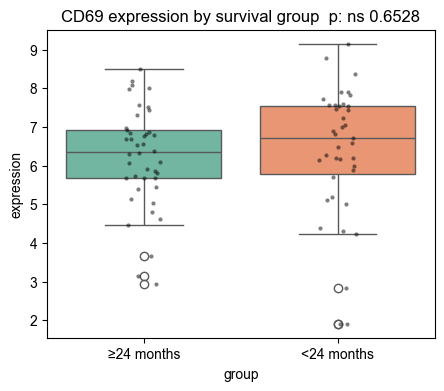

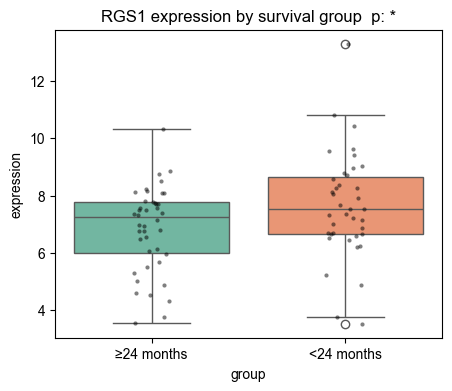

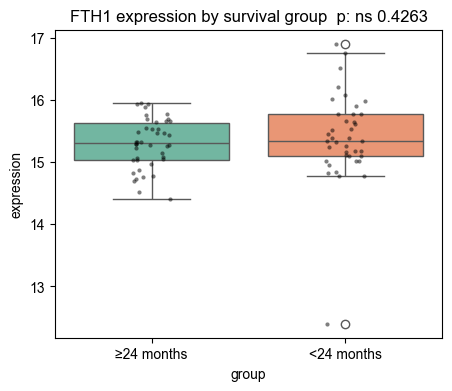

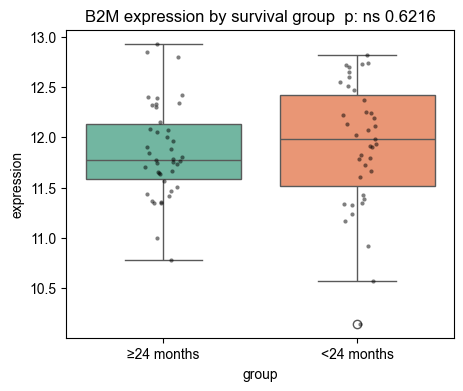

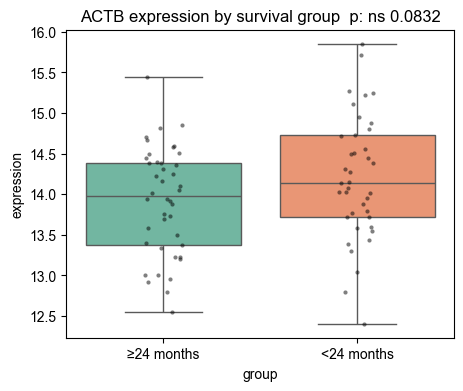

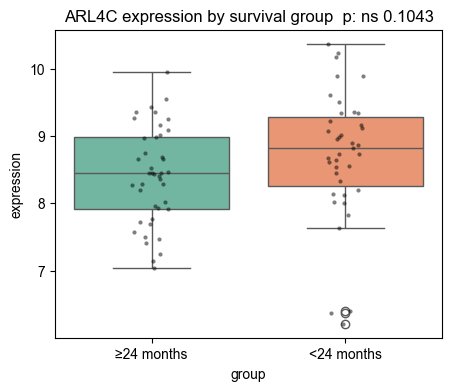

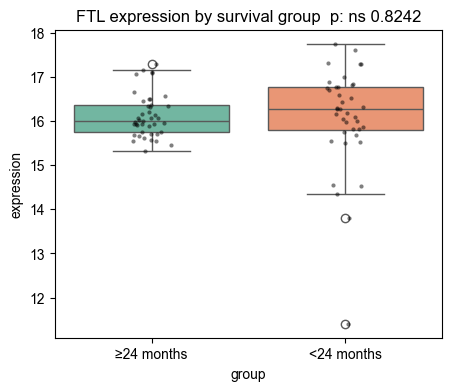

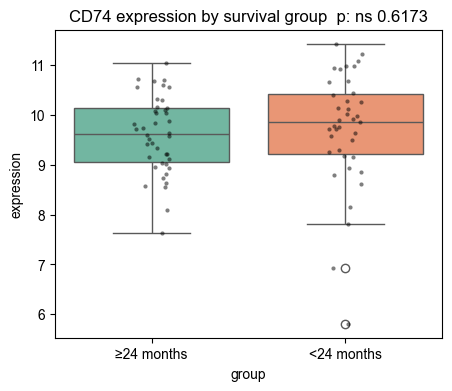

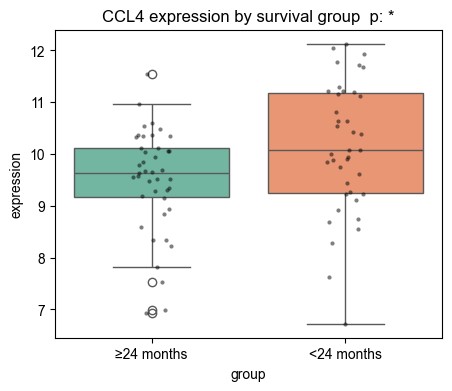

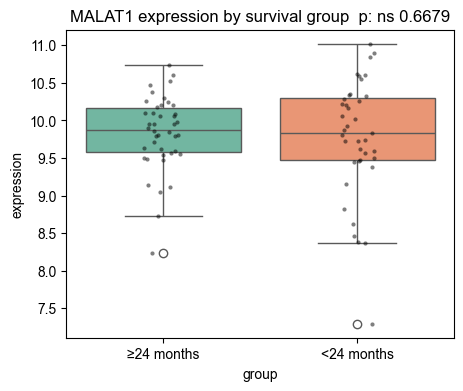

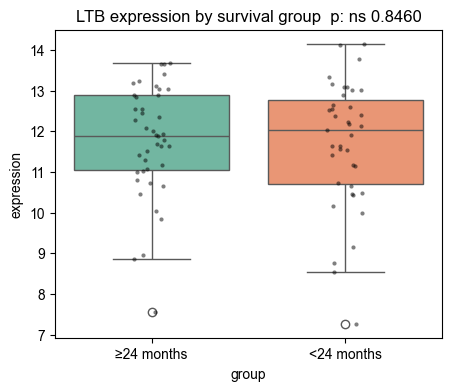

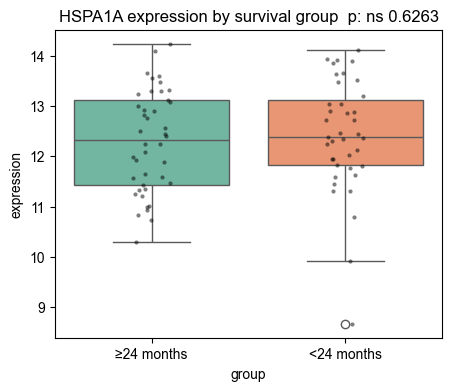

In [ ]:
for types in model_reult:
    model_name = 'XGBoost'
    file =f'new_data/train_shap/feature_importance_{model_name}_{types}.pickle'
    feature_importance = pickle.load(open(file,'rb'))
    feature_importance = feature_importance[feature_importance['Mean SHAP Value']>0]
    df_res,y_r,y_n = get_p(feature_importance)
    df_res.to_csv(f'new_data/train_shap/feature_importance_{model_name}_{types}.GSE54236.P.csv')
    for gene in feature_importance['Feature']:
        if gene not in adata_.var_names:
            continue
        plot_box_p(gene,expr_r,expr_n,model_name,types)
    